首先，我们对一个线性回归函数（linear regression function）进行梯度下降（gradient descent）。残差（residulas）给出如下：

\\[
\sum_{i=1}^{N} (y_i - (\beta_0 + \beta_1x))^2
\\]

这样我们就有两个参数了，分别是$\beta_0$和$\beta_1$，我们需要优化得到它们两个。用矩阵形式，可以将残差函数（residual function）$f$写成下面的形式：

\begin{align}
& (y - X\beta)^2 \\ 
&= (y - X\beta)^T(y - X\beta) \\
&= y^Ty -2\beta^TX^Ty + \beta^TX^TX\beta
\end{align}

对于$\beta$求导数，得到了：

\begin{align}
-2X^Ty + 2(X^TX)\beta
\end{align}

这里当然就可以设导数为零，然后得到了看上去很正常的方程：
\begin{align}
\beta = (X^TX)^{-1}X^Ty 
\end{align}

不过对于展示梯度下降优化的过程，只要求导就可以了。

In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4

u'%.4f'

主要思路
----

给定了已有的测试数据$x$和$y$，残差（residual）就是对向量$\beta$的一个函数。在这个简单的例子中，$\beta$有两个部分组成，所以$r(\beta)$ 是一个曲面（surface），随着$\beta_0$和$\beta_1$而变化。在本章中我们绘制出残差函数的曲面，然后会发现，优化的过程就是试图去找到在这个曲面最底部位置上的$\beta$值，这一点的残差（residual）应该是最小的。可以从任意一个点开始，梯度下降法每次都朝着没一点上梯度方向的相反方向展开一个步长，因此类似『下山（donwhill）』。在最底部的位置，梯度就是0了，所以就不用再下降了。

In [2]:
def resid(y, x, b0, b1):
    b = np.array([b0, b1])
    x = np.vstack([np.ones_like(x), x]).T
    return np.sum((y - np.dot(x, b))**2)

In [3]:
b0, b1 = [100, 5]
xs = np.linspace(0, 1, 101)
ys = b0 + b1*xs + np.random.randn(len(xs))

In [4]:
intervals = 10
us = np.linspace(0, 10, intervals)
vs = np.linspace(0, 10, intervals)
U, V = np.meshgrid(us, vs)
Z = np.array([resid(ys, xs, u, v) for u, v in zip(U.ravel(), V.ravel())])
Z = Z.reshape((intervals, intervals))

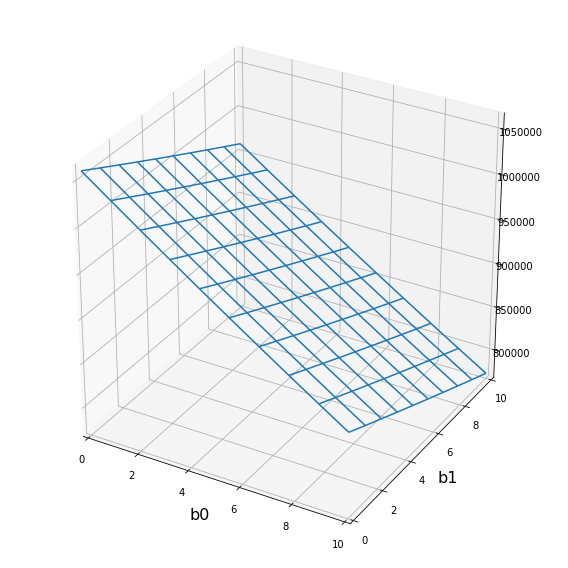

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(U, V, Z, )
plt.xlabel('b0', fontsize=16)
plt.ylabel('b1', fontsize=16)
plt.xlim([0,10])
plt.ylim([0,10])
plt.tight_layout()

梯度下降算法（gradient descent algorithm）
----

In [6]:
def grad(xs, ys, b0, b1):
    b = np.array([b0, b1])
    x = np.vstack([np.ones_like(xs), xs]).T
    return -np.dot(x.T, ys) + np.dot(np.dot(x.T, x), b)

In [7]:
def gradient_descent(xs, ys, b0_, b1_, f, fprime, learn_rate=0.001, tol=1e-6, max_iter=1000):
    b = np.array([b0_, b1_], 'float')
    delta = np.zeros_like(b)

    bs = [[b[0], b[1], f(ys, xs, b[0], b[1])]]
    for i in range(max_iter):
        delta = learn_rate*fprime(xs, ys, b[0], b[1])
        b -= delta
        bs.append([b[0], b[1], f(ys, xs, b[0], b[1])])
        if np.sqrt(np.sum(delta*delta)) < tol:
            break
    return np.array(bs)

In [8]:
bs = gradient_descent(xs, ys, 10, 10, resid, grad, learn_rate=0.001)

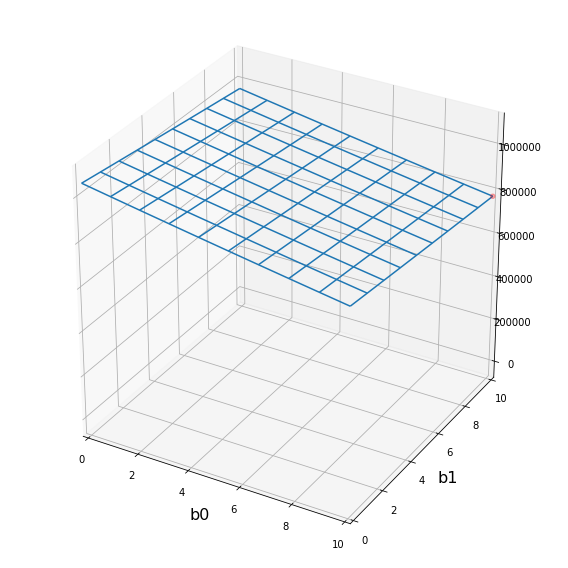

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(U, V, Z, )
ax.scatter(bs[:, 0], bs[:, 1], bs[:,2], c='red')
plt.xlabel('b0', fontsize=16)
plt.ylabel('b1', fontsize=16)
plt.xlim([0,10])
plt.ylim([0,10])
plt.tight_layout()

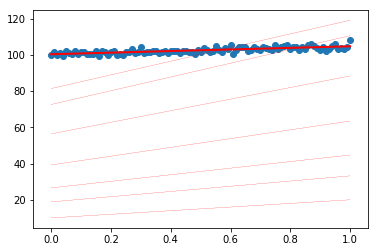

In [10]:
plt.scatter(xs, ys)
for i, b in enumerate(bs[[0,1,2,4,8,16,32]]):
    plt.plot(xs, b[0] + b[1]*xs, c='red', linewidth=0.2);
plt.plot(xs, bs[-1,0] + bs[-1,1]*xs, c='red', linewidth=2)

In [11]:
x = np.vstack([np.ones_like(xs), xs]).T

print "Solution from gradient descent", bs[-1, :2]
print "Solution from normal equations", np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T), ys)
print "Soluiton using numpy leastsq", np.linalg.lstsq(x, ys)[0]

Solution from gradient descent [ 100.3065    4.3883]
Solution from normal equations [ 100.3317    4.3413]
Soluiton using numpy leastsq [ 100.3317    4.3413]
